In [1]:
# CNN implementation from Scratch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import pickle
import random

from PIL import Image
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

from skimage.io import imread, imshow
from skimage.color import rgb2gray, rgb2hsv
from skimage.morphology import area_opening
from skimage.exposure import histogram
from skimage.filters import threshold_otsu

from sklearn.metrics import confusion_matrix

In [2]:
#File Paths for images in local directory
G1DATADIR = "CompletePreprocess_RiceDiseaseDataset\\validation\\"

DATADIR = "dataset\\validation\\"

CROPDATADIR = "thresh_dataset\\cropped_test\\"

NEWDATADIR = "dataset\\RiceLeafs\\RiceLeafs\\validation\\"

TWO_CTGR = ["Disease", "Healthy"]

CATEGORIES = ["BrownSpot","Healthy", 'Hispa', 'LeafBlast']

SMOLDATADIR = "small_dataset\\Testing\\"
SMOL_CTGR = ["Bacterial leaf blight", "Brown spot", "Leaf smut" ]

In [3]:
#Masking
def masked_image(image, mask):
    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask
    return np.dstack([r,g,b])

In [ ]:
# #Preprocessing (otsu_thresholding, BGR to RGB and resizing)

# for category in CATEGORIES:
#     count = 1
#     path = os.path.join(DATADIR, category)
#     for img in os.listdir(path):
#         #Create Filenames for preprocessed images
#         filename = category + str(count) + ".png"
#         print(filename)
#         count+=1
#         #Loading image from directory
#         some_img = imread(os.path.join(path,img))
        
        
#         gray_img = rgb2gray(some_img)
        
        
#         thresh = threshold_otsu(gray_img)
#         thresh_otsu = gray_img < thresh
        
#         filtered = masked_image(some_img, thresh_otsu)
#         resize_img = cv2.resize(filtered, (227,227), interpolation = cv2.INTER_AREA)
#         rgb_img = cv2.cvtColor(resize_img, cv2.COLOR_BGR2RGB)
        
#         cv2.imwrite(filename, rgb_img)

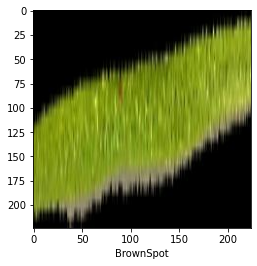

In [3]:
#Shows images from CROPDATADIR file path
for category in CATEGORIES:
    path = os.path.join(G1DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.COLOR_BGR2GRAY)
        RBG_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        plt.xlabel(category)
        plt.imshow(RBG_img)
        plt.show
        break
    break

BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot
BrownSpot


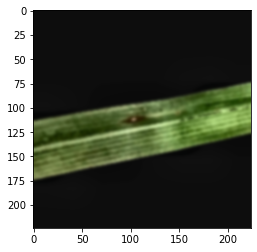

In [105]:
#Build Testing DATASET with triple contrasting
testing_data = []

def create_testing_data():
    for i in range(len(CATEGORIES)):
        category = CATEGORIES[i]
        path = os.path.join(CROPDATADIR, category)
        for img in os.listdir(path):
            img_path = os.path.join(path,img)
            image_file = Image.open(img_path)

#             image_file.save(img, quality = 95)
            
            
            img_array = cv2.imread(os.path.join(path,img))
            
            clahe = cv2.createCLAHE(clipLimit = 3, tileGridSize = (8,8))
            
            resize_img = cv2.resize(img_array, (224,224), interpolation = cv2.INTER_AREA)
            lab = cv2.cvtColor(resize_img, cv2.COLOR_RGB2LAB)
            l, a, b = cv2.split(lab)

            l2 = clahe.apply(l)

            lab = cv2.merge((l2,a,b))

            enc_img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

#         test_img_new = enc_img * [0,1,0] #Only color is green [R,G,B]
            test_img_new = cv2.cvtColor(enc_img, cv2.COLOR_RGB2LAB)
            l,a,b = cv2.split(test_img_new)

            l2 = clahe.apply(l)

            lab = cv2.merge((l2,a,b))

            enc_img = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)

#             test_img_new = cv2.cvtColor(enc_img, cv2.COLOR_RGB2LAB)
#             l,a,b = cv2.split(test_img_new)

#             l2 = clahe.apply(l)

#             lab = cv2.merge((l2,a,b))

#             test_img_new = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)
            
            kernel = np.array([[0, -1, 0],
                               [-1, 5.35,-1],
                               [0, -1, 0]])
            
            sharp_img = cv2.filter2D(enc_img, ddepth = -1, kernel = kernel)

#            RBG_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            blur_img = cv2.GaussianBlur(enc_img, (7,7), 0)
            plt.imshow(blur_img)
            
            testing_data.append([blur_img,i])
            print(CATEGORIES[i])
           

create_testing_data()

Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease
Disease


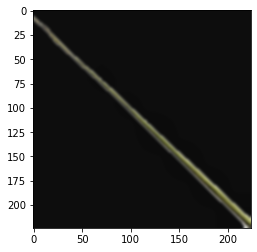

In [24]:
#Build the actual TESTING DATASET on TWO Classes (Disease, Healthy)
testing_data = []

def create_testing_data():
    for i in range(len(TWO_CTGR)):
        category = TWO_CTGR[i]
        path = os.path.join(NEWDATADIR, category)
        for img in os.listdir(path):
            img_path = os.path.join(path,img)
            image_file = Image.open(img_path)

#             image_file.save(img, quality = 95)
            
            img_array = cv2.imread(os.path.join(path,img))
        
            resize_img = cv2.resize(img_array, (224,224), interpolation = cv2.INTER_AREA)
        
        
            gray_img = rgb2gray(resize_img)


            thresh = threshold_otsu(gray_img)
            thresh_otsu = gray_img < thresh

            filtered = masked_image(resize_img, thresh_otsu)
            
            clahe = cv2.createCLAHE(clipLimit = 3, tileGridSize = (8,8))
            
            
            lab = cv2.cvtColor(filtered, cv2.COLOR_RGB2LAB)
            l, a, b = cv2.split(lab)

            l2 = clahe.apply(l)

            lab = cv2.merge((l2,a,b))

            enc_img = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)
            

    #         test_img_new = enc_img * [0,1,0] #Only color is green [R,G,B]
            test_img_new = cv2.cvtColor(enc_img, cv2.COLOR_RGB2LAB)
            l,a,b = cv2.split(test_img_new)

            l2 = clahe.apply(l)

            lab = cv2.merge((l2,a,b))

            enc_img = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)
            enc_img = cv2.cvtColor(enc_img, cv2.COLOR_BGR2RGB)
#             test_img_new = cv2.cvtColor(enc_img, cv2.COLOR_RGB2LAB)
#             l,a,b = cv2.split(test_img_new)

#             l2 = clahe.apply(l)

#             lab = cv2.merge((l2,a,b))

#             test_img_new = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)
            kernel = np.array([[0, -1, 0],
                               [-1, 5,-1],
                               [0, -1, 0]])
            sharp_img = cv2.filter2D(enc_img, ddepth = -1, kernel = kernel)

#             RBG_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            blur_img = cv2.GaussianBlur(sharp_img, (7,7), 0)
            plt.imshow(blur_img)
            
            testing_data.append([blur_img,i])
            print(TWO_CTGR[i])
#             break
#         break
create_testing_data()

In [25]:
#Important: Shuffle testing_data to rearrange the dataset itself

random.shuffle(testing_data)


In [26]:
print(len(testing_data))

671


In [27]:
#Separation of images from their respective labels/classes

X = []
y = []

for features, label in testing_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, 224,224,3)
print(len(X))
print(len(y))
y[:10]

671
671


[1, 1, 0, 1, 0, 0, 0, 1, 1, 0]

In [29]:
#Turn x(images), and y(labels) arrays to pickle files

pickle_out = open('pickles\\X_test_cropped_lab2_blur_two_classes.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('pickles\\y_test_cropped_lab2_blur_two_classes.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()


# Creating Dataset with 3 Classes (Blight, Brown Spots, Leaf Smut)

In [19]:
#Build the actual TRAINING DATASET on THREE Classes (Bacterial leaf blight, Brown spot, Leaf smut)
training_data = []
blight_data = []
brown_data = []
smut_data = []
def create_testing_data():
    for i in range(len(SMOL_CTGR)):
        category = SMOL_CTGR[i]
        path = os.path.join(SMOLDATADIR, category)
        for img in os.listdir(path):
            img_path = os.path.join(path,img)
            image_file = Image.open(img_path)

#             image_file.save(img, quality = 95)
            
            img_array = cv2.imread(os.path.join(path,img))
        
            resize_img = cv2.resize(img_array, (224,224), interpolation = cv2.INTER_AREA)
        
        
            gray_img = rgb2gray(resize_img)


            thresh = threshold_otsu(gray_img)
            thresh_otsu = gray_img < thresh
            
            
            if (img == "blacked1.jpg" or img == "blacked2.jpg") and category == "Leaf smut":
                print("Found black images")
                filtered = cv2.cvtColor(resize_img, cv2.COLOR_BGR2RGB)
                lab = cv2.cvtColor(filtered, cv2.COLOR_RGB2LAB)
            else:
                filtered = masked_image(resize_img, thresh_otsu)
                filtered = cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB)
                lab = cv2.cvtColor(filtered, cv2.COLOR_RGB2LAB)
            
            
            
            
            
            clahe = cv2.createCLAHE(clipLimit = 3, tileGridSize = (8,8))
            
            
#             lab = cv2.cvtColor(filtered, cv2.COLOR_RGB2LAB)
            l, a, b = cv2.split(lab)

            l2 = clahe.apply(l)

            lab = cv2.merge((l2,a,b))
            
            enc_img = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)

    #         test_img_new = enc_img * [0,1,0] #Only color is green [R,G,B]
            test_img_new = cv2.cvtColor(enc_img, cv2.COLOR_RGB2LAB)
            l,a,b = cv2.split(test_img_new)

            l2 = clahe.apply(l)

            lab = cv2.merge((l2,a,b))

            enc_img = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)
            
            rotate_90_img_enc = cv2.rotate(enc_img, cv2.cv2.ROTATE_90_CLOCKWISE)
            rotate_270_img_enc = cv2.rotate(enc_img, cv2.cv2.ROTATE_90_COUNTERCLOCKWISE)
            rotate_180_img_enc = cv2.rotate(enc_img, cv2.ROTATE_180)
            
            flip_x_enc = cv2.flip(enc_img, 0)
            flip_y_enc = cv2.flip(enc_img, 1)
            flip_xy_enc = cv2.flip(enc_img, -1)
#             test_img_new = cv2.cvtColor(enc_img, cv2.COLOR_RGB2LAB)
#             l,a,b = cv2.split(test_img_new)

#             l2 = clahe.apply(l)

#             lab = cv2.merge((l2,a,b))

#             test_img_new = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)
            kernel = np.array([[0, -1, 0],
                               [-1, 4.9,-1],
                               [0, -1, 0]])
            sharp_img = cv2.filter2D(enc_img, ddepth = -1, kernel = kernel)
        
            rotate_90_img_sharp = cv2.rotate(sharp_img, cv2.cv2.ROTATE_90_CLOCKWISE)
            rotate_270_img_sharp = cv2.rotate(sharp_img, cv2.cv2.ROTATE_90_COUNTERCLOCKWISE)
            rotate_180_img_sharp = cv2.rotate(sharp_img, cv2.ROTATE_180)
            
            flip_x_sharp = cv2.flip(sharp_img, 0)
            flip_y_sharp = cv2.flip(sharp_img, 1)
            flip_xy_sharp = cv2.flip(sharp_img, -1)
#             RBG_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)

            blur_img = cv2.GaussianBlur(sharp_img, (7,7), 0)
    
            rotate_90_img_blur = cv2.rotate(blur_img, cv2.cv2.ROTATE_90_CLOCKWISE)
            rotate_270_img_blur = cv2.rotate(blur_img, cv2.cv2.ROTATE_90_COUNTERCLOCKWISE)
            rotate_180_img_blur = cv2.rotate(blur_img, cv2.ROTATE_180)
            
            flip_x_blur = cv2.flip(blur_img, 0)
            flip_y_blur = cv2.flip(blur_img, 1)
            flip_xy_blur = cv2.flip(blur_img, -1)
            
            if category == "Bacterial leaf blight":
                blight_data.append([sharp_img,i])
                blight_data.append([rotate_90_img_sharp,i])
                blight_data.append([rotate_180_img_sharp,i])
                blight_data.append([rotate_270_img_sharp,i])
                blight_data.append([flip_x_sharp,i])
                blight_data.append([flip_y_sharp,i])
                blight_data.append([flip_xy_sharp,i])

                blight_data.append([enc_img,i])
                blight_data.append([rotate_90_img_enc,i])
                blight_data.append([rotate_180_img_enc,i])
                blight_data.append([rotate_270_img_enc,i])
                blight_data.append([flip_x_enc,i])
                blight_data.append([flip_y_enc,i])
                blight_data.append([flip_xy_enc,i])

                blight_data.append([blur_img,i])
                blight_data.append([rotate_90_img_blur,i])
                blight_data.append([rotate_180_img_blur,i])
                blight_data.append([rotate_270_img_blur,i])
                blight_data.append([flip_x_blur,i])
                blight_data.append([flip_y_blur,i])
                blight_data.append([flip_xy_blur,i])
            elif category == "Brown spot":
                brown_data.append([sharp_img,i])
                brown_data.append([rotate_90_img_sharp,i])
                brown_data.append([rotate_180_img_sharp,i])
                brown_data.append([rotate_270_img_sharp,i])
                brown_data.append([flip_x_sharp,i])
                brown_data.append([flip_y_sharp,i])
                brown_data.append([flip_xy_sharp,i])

                brown_data.append([enc_img,i])
                brown_data.append([rotate_90_img_enc,i])
                brown_data.append([rotate_180_img_enc,i])
                brown_data.append([rotate_270_img_enc,i])
                brown_data.append([flip_x_enc,i])
                brown_data.append([flip_y_enc,i])
                brown_data.append([flip_xy_enc,i])

                brown_data.append([blur_img,i])
                brown_data.append([rotate_90_img_blur,i])
                brown_data.append([rotate_180_img_blur,i])
                brown_data.append([rotate_270_img_blur,i])
                brown_data.append([flip_x_blur,i])
                brown_data.append([flip_y_blur,i])
                brown_data.append([flip_xy_blur,i])
            elif category == "Leaf smut":
                smut_data.append([sharp_img,i])
                smut_data.append([rotate_90_img_sharp,i])
                smut_data.append([rotate_180_img_sharp,i])
                smut_data.append([rotate_270_img_sharp,i])
                smut_data.append([flip_x_sharp,i])
                smut_data.append([flip_y_sharp,i])
                smut_data.append([flip_xy_sharp,i])

                smut_data.append([enc_img,i])
                smut_data.append([rotate_90_img_enc,i])
                smut_data.append([rotate_180_img_enc,i])
                smut_data.append([rotate_270_img_enc,i])
                smut_data.append([flip_x_enc,i])
                smut_data.append([flip_y_enc,i])
                smut_data.append([flip_xy_enc,i])

                smut_data.append([blur_img,i])
                smut_data.append([rotate_90_img_blur,i])
                smut_data.append([rotate_180_img_blur,i])
                smut_data.append([rotate_270_img_blur,i])
                smut_data.append([flip_x_blur,i])
                smut_data.append([flip_y_blur,i])
                smut_data.append([flip_xy_blur,i])
                
            if (img == "blacked1" or img == "blacked2") and category == "Leaf smut":
                filtered = cv2.cvtColor(resize_img, cv2.COLOR_BGR2RGB)
                lab = cv2.cvtColor(filtered, cv2.COLOR_RGB2LAB)
                plt.imshow(lab)
            print(SMOL_CTGR[i])
create_testing_data()

Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Bacterial leaf blight
Brown spot
Brown spot
Brown spot
Brown spot
Brown spot
Brown spot
Found black images
Leaf smut
Found black images
Leaf smut
Leaf smut
Leaf smut
Leaf smut
Leaf smut


In [20]:

print("Blight: ", len(blight_data), " Brown spot: " , len(brown_data) ," Smut: " , len(smut_data))


Blight:  126  Brown spot:  126  Smut:  126


In [21]:
#Important: Shuffle training_data to rearrange the dataset itself
random.shuffle(blight_data)
random.shuffle(brown_data)
random.shuffle(smut_data)

In [24]:
test_dataset = []
X_test = []
y_test = []
for features, label in blight_data:
    test_dataset.append([features,label])
for features, label in brown_data:
    test_dataset.append([features,label])
for features, label in smut_data:
    test_dataset.append([features,label])

random.shuffle(test_dataset)

for features, label in test_dataset:
    X_test.append(features)
    y_test.append(label)
    
print(len(X_test))
print(y_test[:10])

X_test = np.array(X_test).reshape(-1,224,224,3)

print(X_test.shape)

378
[0, 2, 2, 2, 2, 1, 2, 0, 2, 0]
(378, 224, 224, 3)


In [25]:
#Turn x(images), and y(labels) arrays to pickle files
pickle_out = open('pickles\\small_dataset\\X_test_3_classes.pickle', 'wb')
pickle.dump(X_test, pickle_out)


pickle_out = open('pickles\\small_dataset\\y_test_3_classes.pickle', 'wb')
pickle.dump(y_test, pickle_out)

pickle_out.close()